# Çoklu Doğrusal Regrsyon

### Bir üretici, bir araba üretiyor ve arabanın yakıt verimliliğini artırmak için farklı motor özelliklerini test ediyor. Üretici, araba motorunun çeşitli bileşenleri için farklı değerler kullanarak bir test planı oluşturur ve bu değerleri kullanarak arabanın yakıt verimliliğini ölçer. Bu verileri kullanarak, arabanın yakıt verimliliği ile motor özellikleri arasındaki ilişkiyi belirlemek için çoklu doğrusal regresyon modeli oluşturmak istiyoruz.

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [45]:
# veri setini hazırlayalım.

bilesen1 = range(2, 14)
bilesen2 = range(3, 15)
bilesen3 = range(4, 16)
bilesen4 = range(5, 17)
yakit_verimliligi = np.array([28.5, 32.0, 36.2, 41.1, 45.8, 50.3, 54.1, 59.0, 62.8, 67.2, 71.1, 75.2])

data = pd.DataFrame({
    'bilesen1':bilesen1, 'bilesen2':bilesen2, 'bilesen3':bilesen3, 'bilesen4':bilesen4, 
    'Yakıt Verimliliği':yakit_verimliligi
})
data.head()

,bilesen1,bilesen2,bilesen3,bilesen4,Yakıt Verimliliği
0,2,3,4,5,28.5
1,3,4,5,6,32.0
2,4,5,6,7,36.2
3,5,6,7,8,41.1
4,6,7,8,9,45.8


# Veri Analiz - Ön İşleme

In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bilesen1,12.0,7.500000,3.605551,2.0,4.750,7.5,10.25,13.0
bilesen2,12.0,8.500000,3.605551,3.0,5.750,8.5,11.25,14.0
bilesen3,12.0,9.500000,3.605551,4.0,6.750,9.5,12.25,15.0
bilesen4,12.0,10.500000,3.605551,5.0,7.750,10.5,13.25,16.0
Yakıt Verimliliği,12.0,51.941667,15.568410,28.5,39.875,52.2,63.90,75.2


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bilesen1           12 non-null     int64  
 1   bilesen2           12 non-null     int64  
 2   bilesen3           12 non-null     int64  
 3   bilesen4           12 non-null     int64  
 4   Yakıt Verimliliği  12 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 608.0 bytes


In [48]:
# eksik gözlem analizi
data.isnull().sum()

bilesen1             0
bilesen2             0
bilesen3             0
bilesen4             0
Yakıt Verimliliği    0
dtype: int64

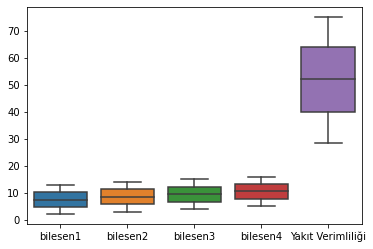

In [50]:
# aykırı gözlem analizi
sns.boxplot(data=data);

In [51]:
# korelasyon analizi 
corr = data.corr()
corr

,bilesen1,bilesen2,bilesen3,bilesen4,Yakıt Verimliliği
bilesen1,1.00000,1.00000,1.00000,1.00000,0.99966
bilesen2,1.00000,1.00000,1.00000,1.00000,0.99966
bilesen3,1.00000,1.00000,1.00000,1.00000,0.99966
bilesen4,1.00000,1.00000,1.00000,1.00000,0.99966
Yakıt Verimliliği,0.99966,0.99966,0.99966,0.99966,1.00000


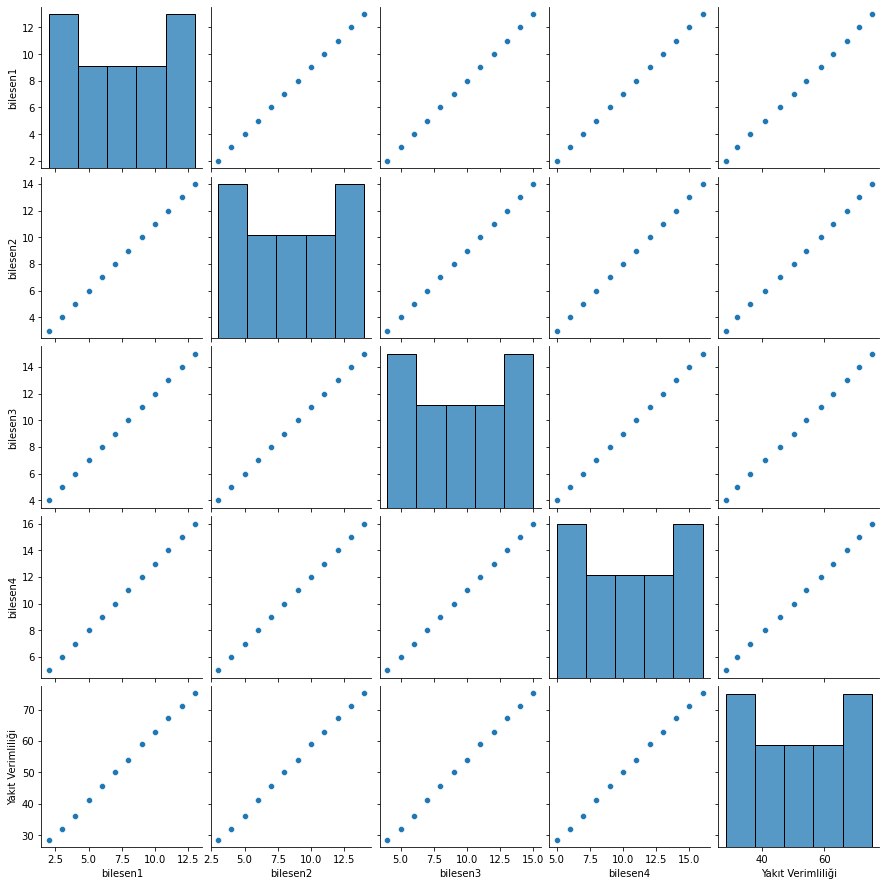

In [52]:
sns.pairplot(data=data);

# Model Oluşturma

In [53]:
# bağımlı ve bağımsız değişkenleri oluşturalım.

X = data[['bilesen1', 'bilesen2', 'bilesen3', 'bilesen4']]
y = data['Yakıt Verimliliği']

In [54]:
# eğitim ve test verilerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
# model oluşturma ve eğitme
model = LinearRegression().fit(X_train, y_train)

In [59]:
# tahmin
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [60]:
# model değerlendirme

print('Eğitim Kümesi Performansı: ')
print('R-kare değeri: ', r2_score(y_train, y_pred_train))
print('MSE değeri: ', mean_squared_error(y_train, y_pred_train))
print('MAE değeri: ', mean_absolute_error(y_train, y_pred_train))
print('----------------------------------------------------------')
print('Test Kümesi Performansı: ')
print('R-kare değeri: ', r2_score(y_test, y_pred_test))
print('MSE değeri: ', mean_squared_error(y_test, y_pred_test))
print('MAE değeri: ', mean_absolute_error(y_test, y_pred_test))

Eğitim Kümesi Performansı: 
R-kare değeri:  0.9993296570601716
MSE değeri:  0.1520576131687238
MAE değeri:  0.32304526748971124
----------------------------------------------------------
Test Kümesi Performansı: 
R-kare değeri:  0.998734572230035
MSE değeri:  0.19381572930954924
MAE değeri:  0.35679012345678274


#### Kullandığımız veri seti çok basit olduğu için modelimizin performansı neredeyse maksimum düzeyde. Bu yüzden model tuning ve doğrulama işlemleri yapmaya gerek yok.

# Tahmin

In [61]:
bilesen1 = float(input('Bileşen 1 değerini giriniz: '))
bilesen2 = float(input('Bileşen 2 değerini giriniz: '))
bilesen3 = float(input('Bileşen 3 değerini giriniz: '))
bilesen4 = float(input('Bileşen 4 değerini giriniz: '))

predict = model.predict([[bilesen1, bilesen2, bilesen3, bilesen4]])

print(f'Tahmini Yakıt Verimliliği: {float(predict)}')

Bileşen 1 değerini giriniz:  3
Bileşen 2 değerini giriniz:  3
Bileşen 3 değerini giriniz:  3
Bileşen 4 değerini giriniz:  3


Tahmini Yakıt Verimliliği: 25.89537037037038


C:\Users\murat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
